In [180]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [181]:
car_dataset=r"C:\Users\sarthak gangwar\PYTHON Programs\Business Project EDA\cardekho_dataset.csv"
df = pd.read_csv(car_dataset)

In [182]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [183]:
df.shape

(15411, 14)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [185]:
#Check NULL values
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [186]:
print(df.fuel_type.value_counts())
print(df.seller_type.value_counts())
print(df.transmission_type.value_counts())

Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: fuel_type, dtype: int64
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: seller_type, dtype: int64
Manual       12225
Automatic     3186
Name: transmission_type, dtype: int64


In [187]:
df.replace({'fuel_type':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
df.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
df.replace({'transmission_type':{'Manual':0,'Automatic':1}},inplace=True)
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,1,0,0,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,1,0,0,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,1,0,0,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,1,0,0,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,0,1,0,22.77,1498,98.59,5,570000


In [188]:
x=df.drop(['car_name','brand','model','selling_price'],axis=1)
y=df['selling_price']
print(x)

       Unnamed: 0  vehicle_age  km_driven  seller_type  fuel_type  \
0               0            9     120000            1          0   
1               1            5      20000            1          0   
2               2           11      60000            1          0   
3               3            9      37000            1          0   
4               4            6      30000            0          1   
...           ...          ...        ...          ...        ...   
15406       19537            9      10723            0          0   
15407       19540            2      18000            0          0   
15408       19541            6      67000            0          1   
15409       19542            5    3800000            0          1   
15410       19543            2      13000            0          0   

       transmission_type  mileage  engine  max_power  seats  
0                      0    19.70     796      46.30      5  
1                      0    18.90    1197      

In [189]:
#splitting train and test data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [190]:
#Linear Regreesion Model
lin_reg_model=LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [191]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [192]:
#prediction on training data
training_data_prediction=lin_reg_model.predict(x_train)

In [193]:
# R Squared Error
error_square=metrics.r2_score(y_train,training_data_prediction)
print("R sqaured Error = ",error_square)

R sqaured Error =  0.6196428489101955


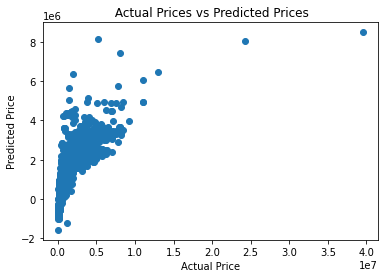

In [194]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [195]:
test_data_prediction=lin_reg_model.predict(x_test)

In [196]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R Squared Error = ",error_score)

R Squared Error =  0.7175380751454157


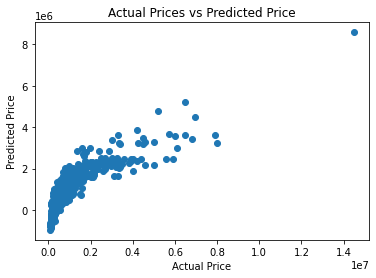

In [197]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [198]:
#Lasso Regression

In [199]:
# loading the linear regression model
lass_reg_model = Lasso()


In [200]:
lass_reg_model.fit(x_train,y_train)
training_data_prediction=lass_reg_model.predict(x_train)

In [201]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(x_train)

In [202]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6196428488835146


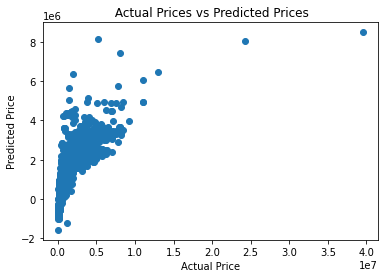

In [203]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [204]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(x_test)

In [205]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7175384054344259


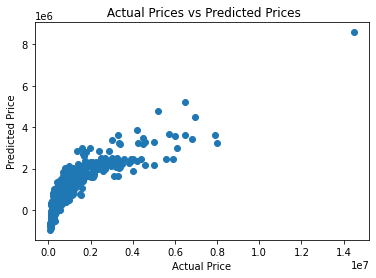

In [206]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()